# Predicting Airbnb Listing Prices Using Machine Learning
![airbnb image](images/airbnb-3399753_1920.jpg)
## Overview
This Airbnb Data Analysis and Insights project aim to extract valuable information and meaningful insights from the Airbnb dataset. The dataset contains various attributes related to Airbnb listings, hosts, and guest reviews. By performing a comprehensive data analysis, we seek to gain a deeper understanding of the Airbnb market, identify trends, and provide actionable recommendations for hosts and the Airbnb platform.

## Business Understanding
The project begins with a thorough understanding of the business problem or question at hand. It involves discussions with stakeholders to identify the goals, objectives, and key performance indicators (KPIs) relevant to the analysis. Understanding the context and objectives is essential to ensure that the data analysis aligns with the organization's strategic priorities.

### Goals and Objectives
1. **Predict Demand and Availability**
Build a model to predict demand for listings based on factors like minimum nights, neighborhood, and room type, and provide insights for hosts to optimize their availability and pricing strategies.

2. **Optimize Pricing Strategy**
Identify key factors that influence pricing and develop a predictive model to help hosts set competitive and optimal listing prices.

3. **Improve Listing Popularity**
Explore the impact of host identity verification, instant bookability, and cancellation policies on listing popularity, and suggest strategies for hosts to increase their listing visibility and attract more bookings.

4. **Location Analysis and Neighborhood Insights**
Analyze the impact of different neighborhoods and geographical coordinates (latitude and longitude) on listing prices, availability, and popularity. Provide insights into the most desirable neighborhoods for hosts and travelers.

5. **Booking Trends and Seasonality**
Investigate booking patterns and trends over time using the 'last review' and 'availability 365' columns. Identify seasonal trends and fluctuations in demand to help hosts optimize pricing and availability strategies throughout the year

### Problem Statement
Airbnb has revolutionized the way travelers explore accommodations, offering a wide variety of unique stays across different locations. However, setting an appropriate price for a listing can be challenging for hosts, and travelers often seek transparency in understanding the factors that contribute to the pricing of a property. To address these challenges, this project aims to **create a predictive model that takes into account various features of Airbnb listings to estimate their prices.**

The significance of accurate pricing cannot be understated. For hosts, setting the right price directly impacts their rental income, occupancy rates, and overall success on the platform. Mispricing can lead to missed booking opportunities or underselling the value of their properties. On the other hand, travelers rely on pricing information to align their budget with their desired accommodation experience, ensuring they receive value for their investment.
By deciphering the web of factors that contribute to listing prices, the resulting predictive model has the potential to enhance both host success and traveler satisfaction.

## Data Understanding
The dataset consists of structured data containing multiple columns representing different features or attributes. These columns may include numerical, categorical, date/time, and text data. Understanding the meaning and significance of each column is crucial for interpreting the data accurately.

The Airbnb dataset for this analysis includes the following columns:

| Column Name                   | Description                                                                                   |
|-------------------------------|-----------------------------------------------------------------------------------------------|
| Host ID                       | Unique identifier for hosts on the platform.                                                 |
| Host Identity Verified        | Indicates whether the host's identity is verified by Airbnb.                                 |
| Host Name                     | Name of the host.                                                                             |
| Neighbourhood Group           | Categorization of neighborhoods into groups.                                                 |
| Neighbourhood                 | Specific neighborhood where the property is located.                                         |
| Latitude and Longitude        | Geographical coordinates of the property's location.                                         |
| Country                       | Country of the listing.                                                                       |
| Country Code                  | Country code of the listing.                                                                  |
| Instant Bookable              | Indicates if the property is available for instant booking.                                  |
| Cancellation Policy           | Policy outlining cancellation terms for guests.                                              |
| Room Type                     | Type of accommodation offered (e.g., Entire home, Private room, Shared room).                |
| Construction Year             | Year of construction of the property.                                                        |
| Price                         | Rental price of the listing.                                                                  |
| Service Fee                   | Additional service fee charged for the booking.                                              |
| Minimum Nights                | Minimum number of nights required for booking.                                               |
| Number of Reviews             | Total number of reviews received for the listing.                                            |
| Last Review                   | Date of the last review for the listing.                                                     |
| Reviews per Month             | Average number of reviews received per month.                                                |
| Review Rate Number            | Numeric representation of review ratings.                                                    |
| Calculated Host Listings Count| Count of listings managed by the host.                                                       |
| Availability 365              | Number of days the listing is available for booking within a year.                            |
| House Rules                   | Rules set by hosts for guests during their stay.                                             |
| License                       | Information about licensing and legal compliance.                                            |


## Data Preparation

First import the necessary packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8-darkgrid")

### Previewing the dataset

In [2]:
# Loading the data using pandas
df = pd.read_csv("data/Airbnb_Open_Data.csv")

# displaying the first 5 rows
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


### Checking the Summary statistics

In [3]:
# Shape of the data
df.shape

(102599, 26)

In [4]:
# Summary Statistics
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [5]:
# Checking the data types of each column
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

### Data Cleaning

Some of the columns may contain missing values, duplicates, outliers, or incorrect formating. In stage we are going to clean the data to be used in modelling. To start with we will start with missing values.

#### Identifying and handling missing values

In [6]:
# Defining a function to identify the percentage of missing values per column
def missing_values_percentage(df):
    total_missing = df.isnull().sum()
    total_rows = df.shape[0]
    missing_percentage = (total_missing / total_rows) * 100
    return missing_percentage

missing_values_percentage(df)

id                                 0.000000
NAME                               0.243667
host id                            0.000000
host_identity_verified             0.281679
host name                          0.395715
neighbourhood group                0.028265
neighbourhood                      0.015595
lat                                0.007797
long                               0.007797
country                            0.518524
country code                       0.127682
instant_bookable                   0.102340
cancellation_policy                0.074075
room type                          0.000000
Construction year                  0.208579
price                              0.240743
service fee                        0.266084
minimum nights                     0.398639
number of reviews                  0.178364
last review                       15.490404
reviews per month                 15.476759
review rate number                 0.317742
calculated host listings count  

Since the license column and the house_rules have above 50% of their values missing, we decided to drop them

In [7]:
# dropping the house_rules and license columns
df.drop(['house_rules', 'license'], axis=1, inplace=True)

In [8]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [9]:
# Dropping all missing values
df.dropna(inplace=True)

In [10]:
df.shape

(83878, 24)

#### Checking for duplicates

After removing the missing values, we now have to check for duplicates in the data and remove them if any

In [11]:
df.duplicated().value_counts()

False    83412
True       466
Name: count, dtype: int64

In [12]:
# Dropping duplicates
df.drop_duplicates(keep="first", inplace=True)

In [13]:
df.shape

(83412, 24)

In [14]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,"$1,060",$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0


#### Removal of Dollar signs

The columns of price and service fee have the dollar sign in their values, we will need to remove them for data modelling

In [15]:
# Define a function to remove them
def remove_dollar_sign(df, cols):
    for col in cols:
        df[col] = df[col].str.replace("$", "")
        df[col] = df[col].str.replace(",", "")
    return df
    
remove_dollar_sign(df, ["price", "service fee"])

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142,28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204,41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577,115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,1060,212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102029,57351953,Cozy room in a 2B with backyard access,5155155913,unconfirmed,Cristina,Queens,Astoria,40.76987,-73.92679,United States,...,2018.0,822,164,1.0,9.0,4/25/2019,0.91,3.0,1.0,0.0
102030,57352505,An East Williamsburg Delight,71564706996,verified,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,...,2015.0,455,91,4.0,36.0,6/27/2018,1.28,1.0,1.0,0.0
102031,57353057,Cozy bedroom in williamsburg,83101851929,verified,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,...,2020.0,1078,216,1.0,58.0,6/10/2019,2.08,5.0,2.0,120.0
102032,57353610,Spacious Room w/ 2 Bed,69037598918,unconfirmed,Christine,Queens,Bayside,40.75047,-73.75349,United States,...,2007.0,103,21,7.0,40.0,6/23/2019,1.51,1.0,5.0,148.0


In [16]:
# Converting price column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

#### Identifying and Handling outliers

We identified oue outliers in price, minimum nights and number of reviews.

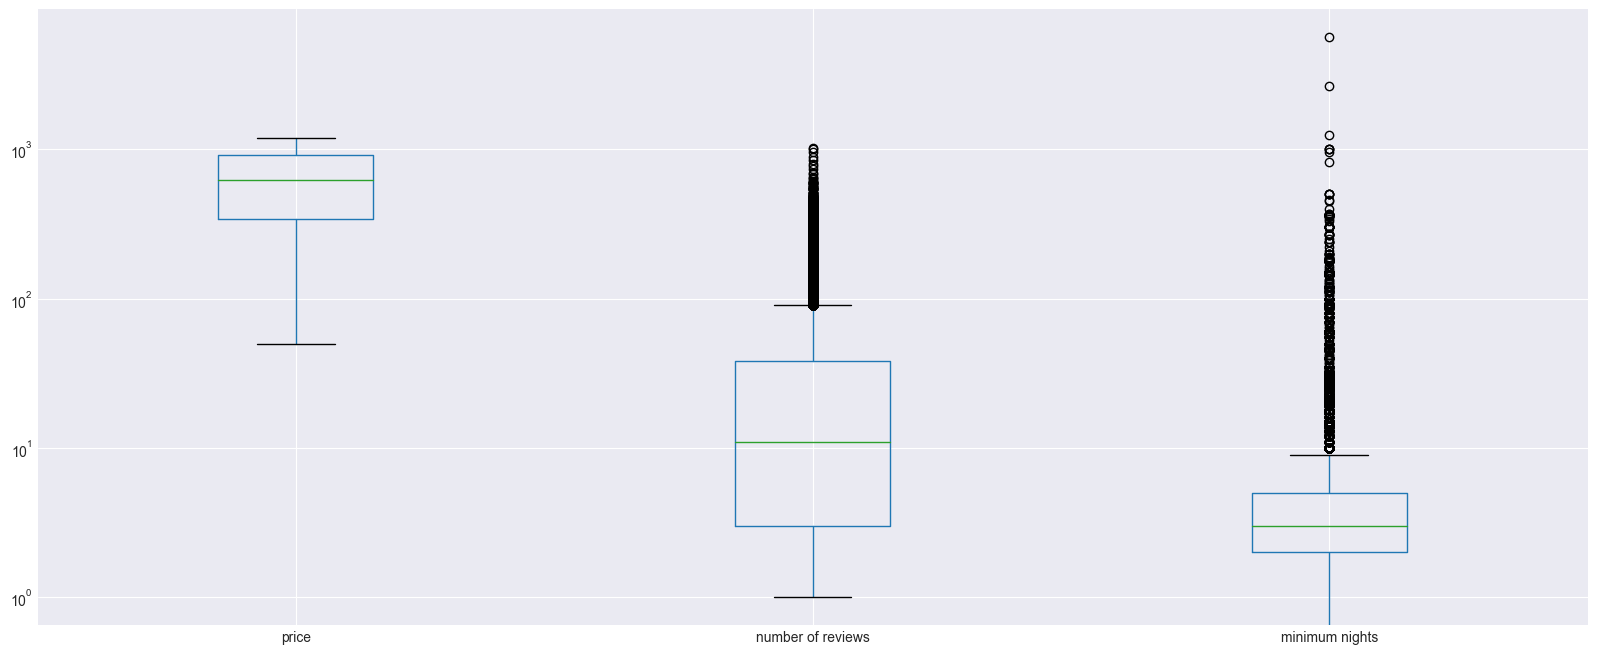

In [17]:
#Identified outliers.
columns = ['price', 'number of reviews', 'minimum nights']
df[columns].boxplot(figsize=(20, 8))
plt.yscale('log')
plt.show()

To remove outliers, we will calculate the IQR (interquartile range) for each column.

In [18]:
# Calculate IQR
columns =['price', 'number of reviews', 'minimum nights']
print("Summary statistics before removing outliers:")
print(df[columns].describe())

Summary statistics before removing outliers:
              price  number of reviews  minimum nights
count  83412.000000       83412.000000    83412.000000
mean     626.219441          32.279037        7.405313
std      331.790851          51.962067       28.102056
min       50.000000           1.000000     -365.000000
25%      340.000000           3.000000        2.000000
50%      625.000000          11.000000        3.000000
75%      914.000000          38.000000        5.000000
max     1200.000000        1024.000000     5645.000000


In [19]:
# IQR For each colunms.
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers from each column
df= df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nSummary statistics after removing outliers:")
print(df[columns].describe())


Summary statistics after removing outliers:
              price  number of reviews  minimum nights
count  62086.000000       62086.000000    62086.000000
mean     625.904423          19.526946        2.641771
std      331.675319          22.040674        1.650172
min       50.000000           1.000000       -1.000000
25%      341.000000           3.000000        1.000000
50%      625.000000          10.000000        2.000000
75%      913.000000          28.000000        3.000000
max     1200.000000          90.000000        9.000000


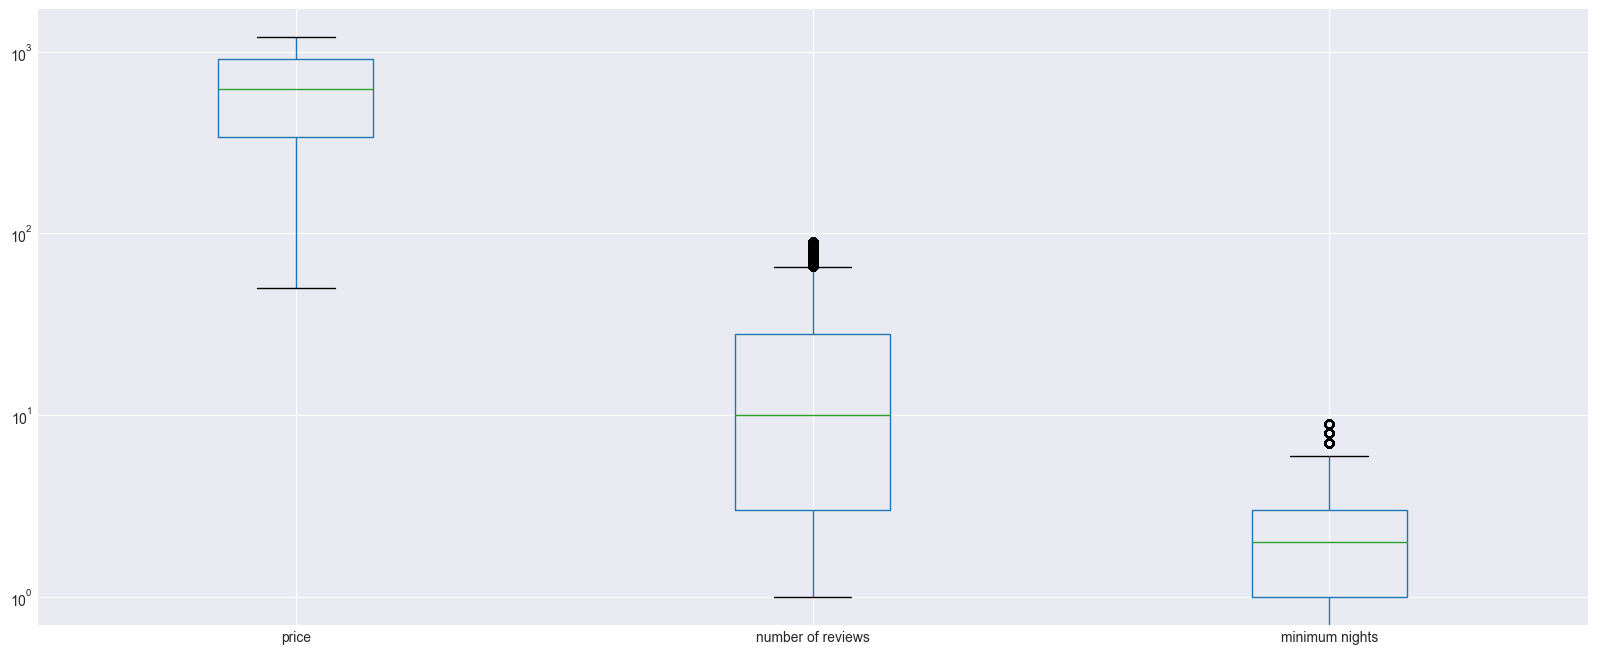

In [20]:
# visualize 
df[columns].boxplot(figsize=(20, 8))
plt.yscale('log')
plt.show()

# Data Visualization

Creating visualization for:
1. Availability 365 vs price.
2. Room type vs price.
3. Popular Name
4. Construction years of Airbnb accommodations
5. Neighborhood vs price

####  Availability 365 vs price.

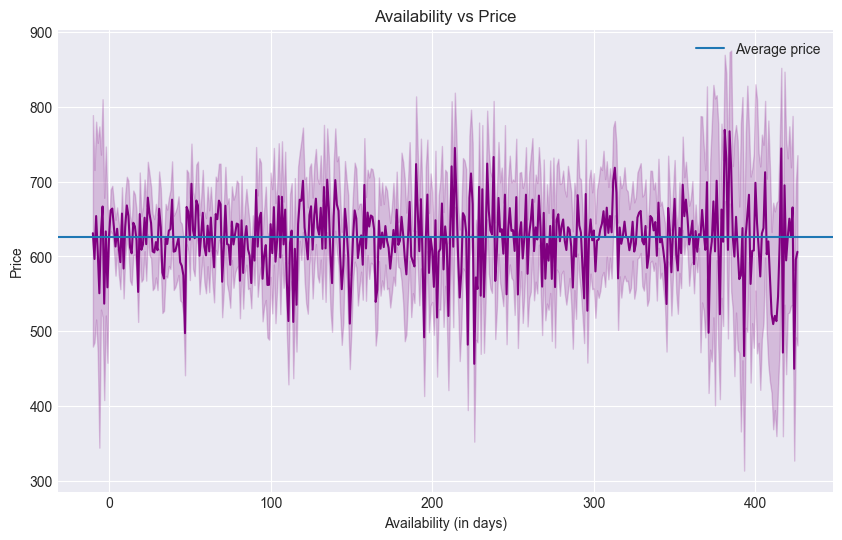

In [21]:
# Create a line plot using Seaborn for Availability 365 vs price.
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="availability 365", y="price", color='purple')
plt.axhline(y=df['price'].mean(), label="Average price")
plt.title("Availability vs Price")
plt.xlabel("Availability (in days)")
plt.ylabel("Price")
plt.legend()
plt.show()

The average price of Airbnb listings is higher for listings with lower availability.
Listings with lower availability are considered to be more desirable, and therefore command a higher price.
There is a large range of prices for listings with the same availability.
This observation suggests that Airbnb hosts can charge a higher price for their listings if they have lower availability. However, it is important to note that there are other factors that can also affect the price of an Airbnb listing, such as the location of the listing, the amenities it offers, and the host's review score.

#### Room type vs Price

In [22]:
# Total price by Room type.
import seaborn as sns


# Create the bar graph
sns.barplot(x='room type', y='price', data=df, estimator=sum, color='purple') 
plt.xlabel("Room Type")
plt.ylabel("Total Price")
plt.title("Total Price by Room Type")

# Show the plot
plt.show()

The bar graph analysis of Airbnb's different room types and their associated prices reveals significant insights for both travelers and potential investors. Entire homes command higher prices, indicating a premium for privacy and amenities. Private rooms are relatively more affordable, appealing to budget-conscious travelers seeking comfort. Shared rooms and hotel rooms  provide affordable choices  for cost-conscious travelers. Investors can leverage the demand for entire homes,while catering to diverse traveler preferences. These insights inform effective marketing strategies, pricing adjustments, and investment decisions. Moreover, understanding the pricing dynamics aids in optimizing user experience and complying with regulations. Overall, the price differentials offer a window into traveler preferences, allowing Airbnb to serve a wide spectrum of guests and offering investors potential opportunities in the market.

####  Popular Name for accommodation

[Text(0.5, 1.0, 'Top 10 most popular names for accommodation')]

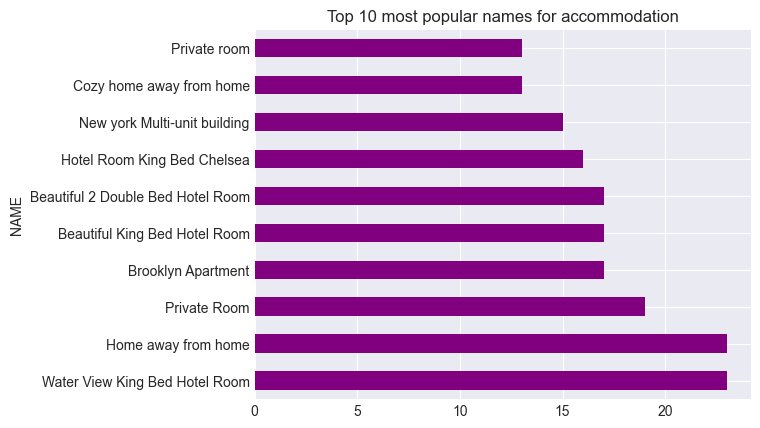

In [ ]:
# assigning NAME columns to Names
Names = df['NAME'].value_counts(ascending=False)

#plotting the top 10
Names.head(10).plot(kind='barh', color = 'purple').set(title='Top 10 most popular names for accommodation')

From the plot above, it is clear that the most popular names in Airbnb is the name 'Home away from home' followed by 'Hillside Hotel' and in the tenth position is 'Cozy home away from home'. With a considerable number of unique and appealing names, hosts demonstrate creativity in crafting titles that capture the essence of their listings. This creativity could play a crucial role in attracting potential guests.

#### Construction years of Airbnb accommodations

[Text(0.5, 1.0, 'Construction years of Airbnb accommodations'),
 Text(0.5, 0, 'Construction year')]

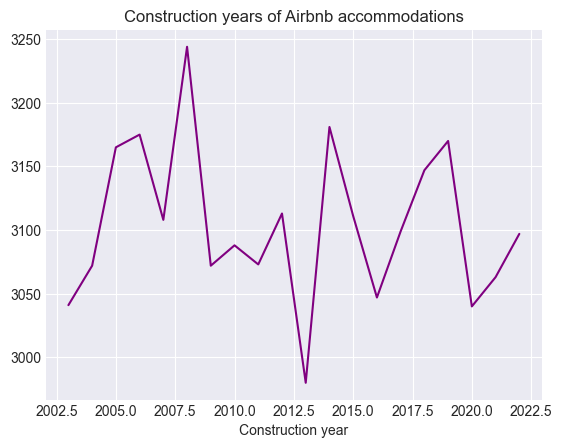

In [ ]:
df.groupby('Construction year')['id'].count().plot(kind='line', color='purple').set(title='Construction years of Airbnb accommodations', xlabel='Construction year')

This graph shows the number of airbnbs constructed through the years 2002 to 2022. we can see in 2014 recorded the highest number of airbnbs constructions. in 2020 there was decline in the number of airbnbs constructions because of the pandemic.After the pandemic there the graph started going upwards.

####  Neighborhood vs price

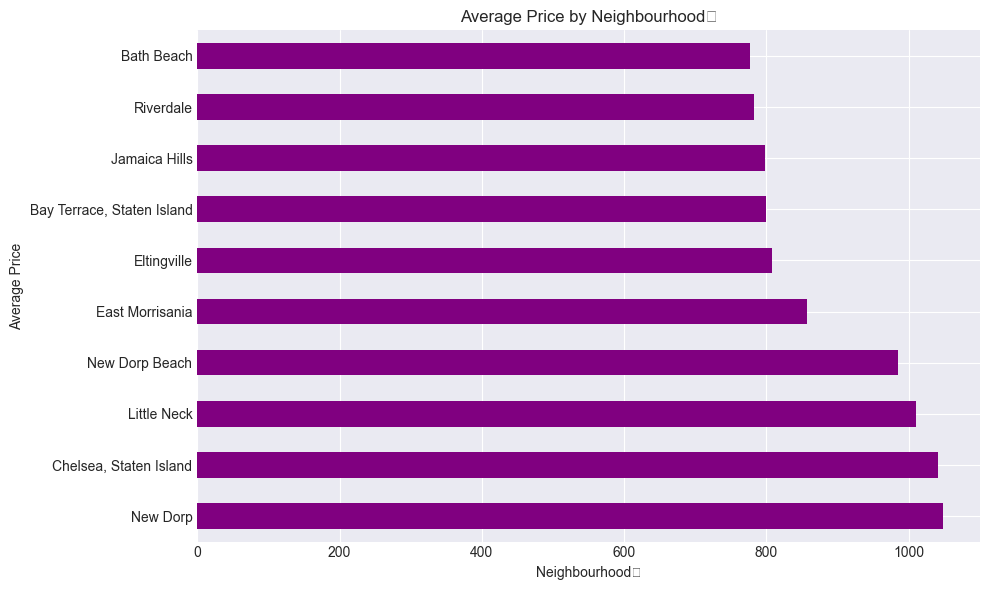

In [ ]:
# Calculate average price for each neighborhood
average_prices = df.groupby('neighbourhood')['price'].mean()

# Sort neighborhoods by average price in descending order
average_prices = average_prices.sort_values(ascending=False)

top_20_neighborhoods = average_prices.head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
top_20_neighborhoods.plot(kind='barh', color='purple')
plt.title('Average Price by Neighbourhood	')
plt.xlabel('Neighbourhood	')
plt.ylabel('Average Price')
plt.xticks()
plt.tight_layout()

# Display the plot
plt.show()

The bar plot reveals that neighbourhoods such as New Dorp were higher in price compared to East Morrisania. As the condition improves, the value tends to increase. Neighbourhoods in excellent condition are generally associated with higher prices. Therefore, ensuring proper upkeep and maintenance of the property is essential for maximizing its valuation.

## Data Modeling